## **CIFAR10 Classification**

## Important packages & Functions

In [ ]:
!pip install hypertools

In [ ]:
#Import important Functions 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from skimage.io import imread, imshow
import hypertools as hyp
%matplotlib inline

In [ ]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
def con_matrix(model,actual ,predict , title): 
  cm = confusion_matrix(actual, predict)
  cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)
  plt.title(title)
  plt.show()
  return cm_display

## Part 0. Dataset Preparation
Using the Cifar10 dataset and devise an appropriate training set split. 

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [ ]:
#download the dataset
from keras.datasets import cifar10
(X_train_img, y_train), (X_test_img, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Shape of Train set: {}'.format(X_train_img.shape))
print('Classes in the data: {}'.format(np.unique(y_train)))

Shape of Train set: (50000, 32, 32, 3)
Classes in the data: [0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


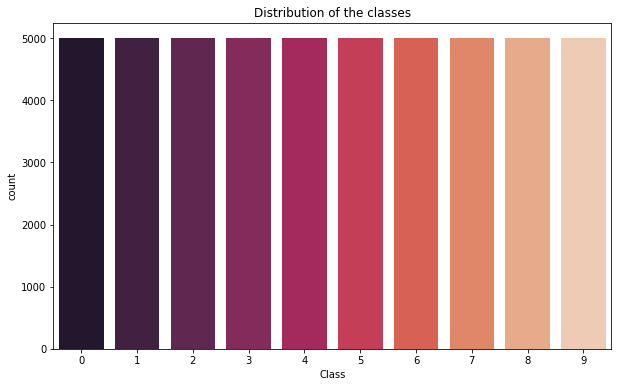

In [ ]:
y_train_df = pd.DataFrame(y_train,columns = ['Class'])
fig = plt.subplots(figsize=(10, 6))
sns.countplot(y_train_df.Class,palette="rocket").set(title='Distribution of the classes')
plt.show()

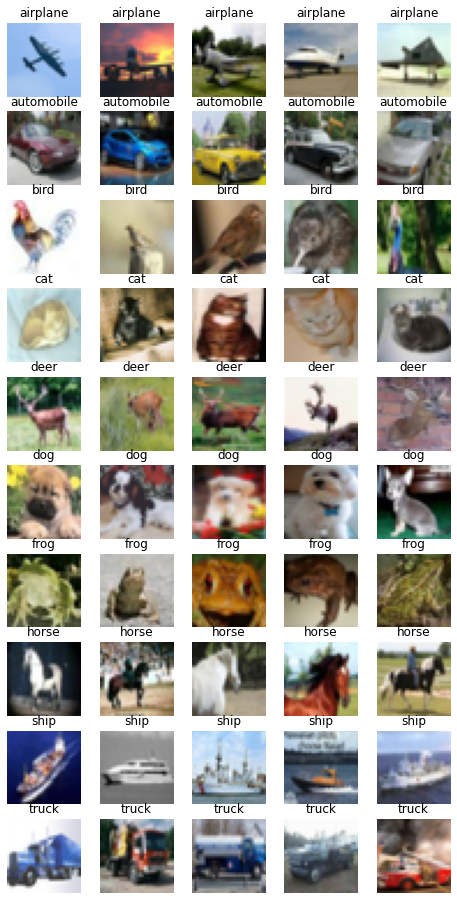

In [ ]:
Classes = ['airplane', 'automobile', 'bird' ,'cat', 'deer','dog' ,'frog','horse','ship','truck']
random.seed(100)
fig, axs = plt.subplots(10, 5,figsize=(8,16))
for Class in range(0,10):
  r = np.where(y_train == Class)[0]
  np.random.shuffle(r)
  im = np.take(X_train_img,r[:5], axis=0)
  #-----------------------------------------#
  for i in (range(5)):
    axs[Class,i].imshow(im[i])
    axs[Class,i].axis('off')
    axs[Class,i].set_title(Classes[Class])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


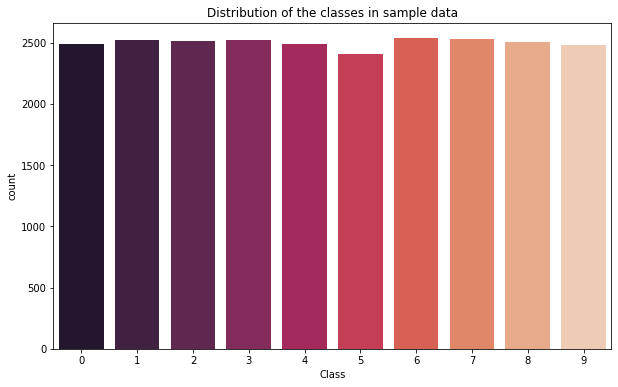

In [ ]:
#Data flatten
x_train = X_train_img.reshape(-1,3072)
x_test = X_test_img.reshape(-1,3072)

#sample of data 
x_train_sample = x_train[:25000]
y_train_sample = y_train[:25000]

x_test_sample = x_train[:5000]
y_test_sample = y_train[:5000]

# ensure that the sample contains all the classes and is not biased toward any of them
y_train_sample_df = pd.DataFrame(y_train_sample,columns = ['Class'])
fig = plt.subplots(figsize=(10, 6))
sns.countplot(y_train_sample_df.Class,palette="rocket").set(title='Distribution of the classes in sample data')
plt.show()

## Part 1. k-NN Classifier
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results


### KNN Class

In [ ]:
#KNN class
def most_common(lst):
    return max((lst), key=lst.count)
def distance (point, data):  
      return np.sqrt(np.sum((point - data)**2, axis=1)) #euclidean distance equation
      
class KNNClassifier():
    def __init__(self, k= 5, dist_metric= distance):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def prediction(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def predict(self, X_test):
        y_pred = self.prediction(X_test)
        return y_pred

### kNN: Varying Number of Neighbors

In [ ]:
test_accuracies = []
ks = [5,9,11,15,19,23,27,33] #random samples of k to find the best k  
for k in ks:
    knn = KNNClassifier(k=k)
    knn.fit(x_train_sample, y_train_sample)
    #----------------------------------#
    pre_test = knn.predict(x_test_sample)
    test_acc = accuracy_score(y_test_sample,pre_test)
    test_accuracies.append(test_acc)
    #----------------------------------#
    print('K number: {}     Testing accuracy:{}'.format(k,test_acc))

K number: 5     Testing accuracy:0.5766
K number: 9     Testing accuracy:0.4484
K number: 11     Testing accuracy:0.4152
K number: 15     Testing accuracy:0.3658
K number: 19     Testing accuracy:0.3466
K number: 23     Testing accuracy:0.3342
K number: 27     Testing accuracy:0.3218
K number: 33     Testing accuracy:0.3084


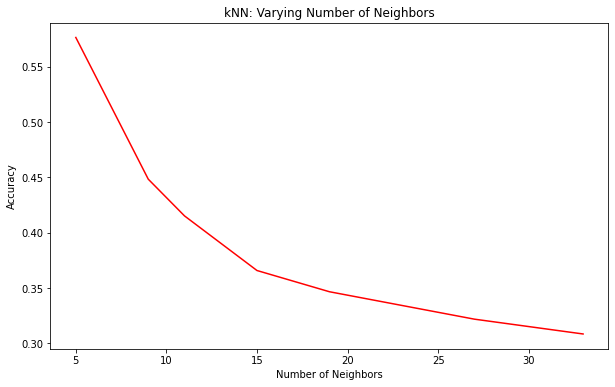

In [ ]:
fig = plt.subplots(figsize=(10, 6))
plt.title('kNN: Varying Number of Neighbors')
plt.plot(ks, test_accuracies, label = 'Testing Accuracy',color = 'r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_scores = {
    'K': ks,
    'Accuracy' : test_accuracies    
    }
knn_scores = pd.DataFrame(knn_scores)
#-------------------------------------------------#
best_k = knn_scores.loc[knn_scores['Accuracy'] == 
                                 knn_scores['Accuracy'].max(), 'K'].values[0]
print('Best value of k: {}'.format(best_k))
print('Best Accuracy is : {}'.format(knn_scores['Accuracy'].max()*100))

Best value of k: 5
Best Accuracy is : 57.66


### Confusion matrix to the best model

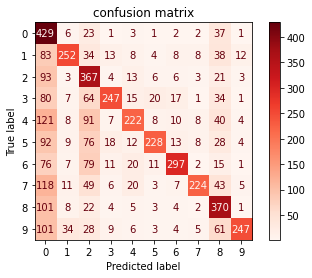

In [ ]:
#model achieved best accuracy
knn = KNNClassifier(k=best_k)
knn.fit(x_train_sample, y_train_sample)
pre = knn.predict(x_test_sample)
acc = accuracy_score(y_test_sample,pre)
print('Accuracy is : {}'.format(acc *100))
con_matrix(knn,y_test_sample,pre,'confusion matrix')

### Part 1 - Discussion

In KNN class, euclidean distance equation is used, in varying k numbers step heigher accuracy was (57.66%) with k = 5. 

The high number of features far from each other caused that low accuracy.

## Part 2. Logistic Regression

For this section I performed binary classification using logistic regression. Just as in Part 1. using the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes.

steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [ ]:
#determine probability
def probabilities (model, test ,test_target) :
  yp=model.predict(test)
  print('Accuracy of clf: {:.2f}%'.format(acc(test_target,yp)))
  yb_proba = model.predict_proba(test)[:,1].reshape(-1,1)
  return yb_proba 

In [ ]:
from sklearn.linear_model import LogisticRegression
def fiting (train ,train_target):
  model = LogisticRegression(random_state=0)
  model.fit(train, train_target)
  return model

In [ ]:
yy=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ff = yy==0
ff.astype(int)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


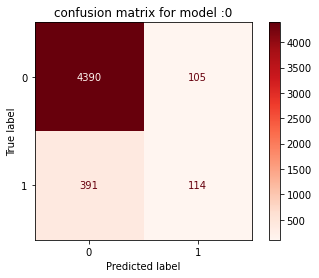

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


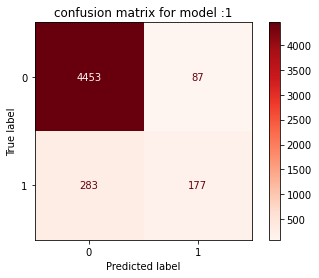

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


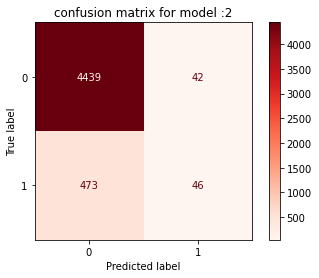

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


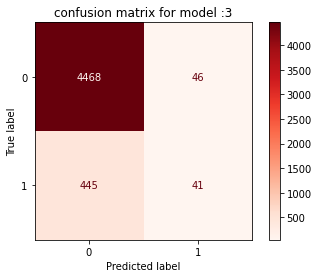

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


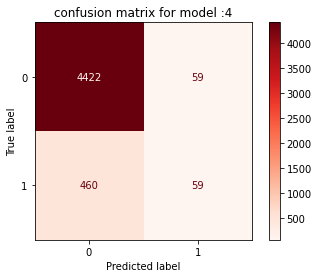

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


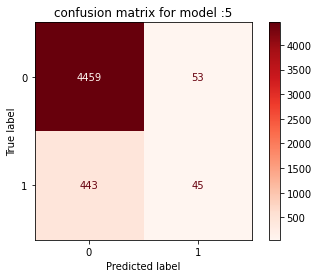

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


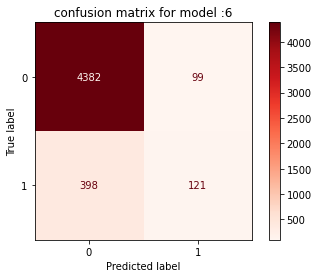

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


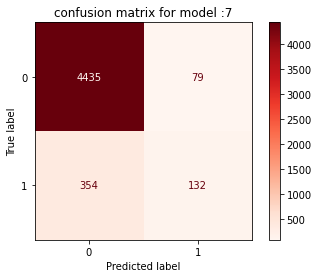

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


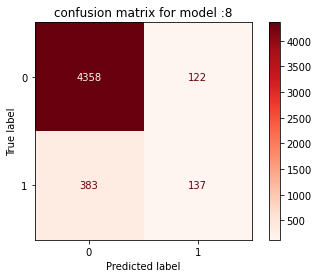

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


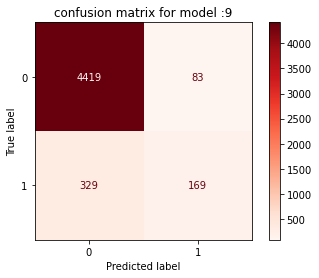

In [ ]:
#fit the model 
lr_acc = []
lr_proba = []
model = LogisticRegression(random_state=0)
labels = np.unique(y_train)
for i in labels:
  ytrain_l = y_train_sample == i
  ytrain_l=ytrain_l.astype(int)

  ytest_l = y_test_sample == i
  ytest_l=ytest_l.astype(int)
  
  model.fit(x_train_sample, ytrain_l)
  y_pred = model.predict(x_test_sample)
  y_proba = model.predict_proba(x_test_sample)[:,1].reshape(-1,1)
  acc = accuracy_score(ytest_l,y_pred)
  con_matrix(model,ytest_l,y_pred, 'confusion matrix for model :{}'.format(i))
  lr_acc.append(acc)
  lr_proba.append(y_proba)

In [ ]:
lr_scores = {
    'Model':range(0,10),
    'Accuracy' : lr_acc,
    }
lr_scores = pd.DataFrame(lr_scores)
lr_scores

,Model,Accuracy
0,0,0.9008
1,1,0.9260
2,2,0.8970
3,3,0.9018
4,4,0.8962
5,5,0.9008
6,6,0.9006
7,7,0.9134
8,8,0.8990
9,9,0.9176


Accuracy of OvR Model: 47.48%


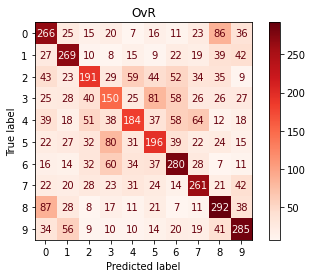

In [ ]:
#final prediction for OvR model
yb_all = np.hstack((lr_proba))
finalovr = np.argmax(yb_all , axis=1)
print('Accuracy of OvR Model: {:.2f}%'.format(accuracy_score(y_test_sample,finalovr)*100))
cm = confusion_matrix(y_test_sample, finalovr)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)
plt.title('OvR')
plt.show()

## Part 3. Support Vector Machine (SVM) Classification

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

### SVM baseline

In [ ]:
from sklearn.svm import LinearSVC
Linear_SVC= LinearSVC(random_state= 0,multi_class= 'ovr')
Linear_SVC.fit(x_train_sample, y_train_sample)
Linear_SVC_pre = Linear_SVC.predict(x_test_sample)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
Linear_SVC_acc = accuracy_score(y_test_sample, Linear_SVC_pre)
print('Accuracy of Linear_SVC Model: {:.2f}%'.format(accuracy_score(y_test_sample, Linear_SVC_pre)*100))

Accuracy of Linear_SVC Model: 22.12%


### Effect of the cost parameter

In [ ]:
LinearSVC_accuracies = []
l = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for c in l : 
  ls=LinearSVC(C=c,random_state=0,multi_class='ovr')
  ls.fit(x_train_sample, y_train_sample)
  Linear_SVC_pre = ls.predict(x_test_sample)
  Linear_SVC_acc = accuracy_score(y_test_sample, Linear_SVC_pre)
  LinearSVC_accuracies.append(Linear_SVC_acc)

In [ ]:
LinearSVC_acc = {
    'c':l,
    'Accuracy' : LinearSVC_accuracies,
    }
LinearSVC_acc = pd.DataFrame(LinearSVC_acc)
LinearSVC_acc

,c,Accuracy
0,0.0001,0.3388
1,0.0010,0.4552
2,0.0100,0.3466
3,0.1000,0.3174
4,1.0000,0.2212
5,10.0000,0.3646
6,100.0000,0.4104
7,1000.0000,0.4104


In [ ]:
best_c = LinearSVC_acc.loc[LinearSVC_acc['Accuracy'] == LinearSVC_acc['Accuracy'].max(), 'c'].values[0]
print('C that achieves the best accuracy is --> {}'.format(best_c))

C that achieves the best accuracy is --> 0.001


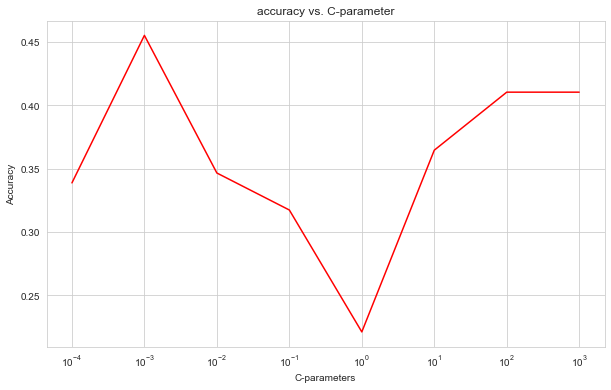

In [ ]:
fig = plt.subplots(figsize=(10, 6))
plt.title('accuracy vs. C-parameter')
plt.plot(LinearSVC_acc['c'],LinearSVC_acc['Accuracy'],color = 'r')
plt.xscale("log")
plt.xlabel('C-parameters')
plt.ylabel('Accuracy')
plt.show()

### Adding Regularization term

In [ ]:
LinearSVC_l1_accuracies = []
l = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for c in l : 
  ls=LinearSVC(penalty='l1',C=c,random_state=0,multi_class='ovr',dual=False)
  ls.fit(x_train_sample, y_train_sample)
  Linear_SVC_pre = ls.predict(x_test_sample)
  Linear_SVC_acc = accuracy_score(y_test_sample, Linear_SVC_pre)
  LinearSVC_l1_accuracies.append(Linear_SVC_acc)

In [ ]:
LinearSVC_l1_accuracies = {
    'c':l,
    'Accuracy' : LinearSVC_l1_accuracies,
    }
LinearSVC_l1_accuracies = pd.DataFrame(LinearSVC_l1_accuracies)
LinearSVC_l1_accuracies

,c,Accuracy
0,0.0001,0.4268
1,0.0010,0.5016
2,0.0100,0.5442
3,0.1000,0.5508
4,1.0000,0.5498
5,10.0000,0.5508
6,100.0000,0.5508
7,1000.0000,0.5508


In [ ]:
best_c_with_l = LinearSVC_l1_accuracies.loc[LinearSVC_l1_accuracies['Accuracy'] == LinearSVC_l1_accuracies['Accuracy'].max(), 'c'].values[0]
print('C that achieves the best accuracy is --> {}'.format(best_c_with_l))

C that achieves the best accuracy is --> 0.1


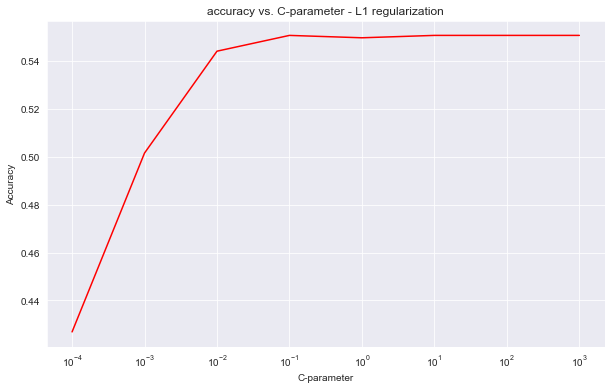

In [ ]:
fig = plt.subplots(figsize=(10, 6))
plt.title('accuracy vs. C-parameter - L1 regularization')
plt.plot(LinearSVC_l1_accuracies['c'],LinearSVC_l1_accuracies['Accuracy'],color = 'r')
plt.xscale("log")
plt.xlabel('C-parameter')
plt.ylabel('Accuracy')
plt.show()

### Final experiment you will use the SVC() function

In [ ]:
tr = x_train_sample/255
ts = x_test_sample/255

In [ ]:
from sklearn.svm import SVC
SVC_accuracies = []
cost = []
gamma= []
co = [0.01, 0.1, 1, 10, 100]
gm = [0.01, 0.1, 1, 10, 100]
for c in co : 
  for g in gm:
    svm = SVC(C= c, kernel='rbf',gamma= g)
    svm.fit(tr, y_train_sample)
    svm_pre = svm.predict(ts)
    svm_acc = accuracy_score(y_test_sample, svm_pre)
    SVC_accuracies.append(svm_acc)
    cost.append(c)
    gamma.append(g)

In [ ]:
all_acc = {
    'Cost':cost,
    'gamma' : gamma,
    'Accuracy':SVC_accuracies
    }
all_acc = pd.DataFrame(all_acc)
all_acc

,Cost,gamma,Accuracy
0,0.01,0.01,0.2702
1,0.01,0.10,0.1038
2,0.01,1.00,0.1038
3,0.01,10.00,0.1038
4,0.01,100.00,0.1038
5,0.10,0.01,0.4618
6,0.10,0.10,0.1038
7,0.10,1.00,0.1038
8,0.10,10.00,0.1038
9,0.10,100.00,0.1038


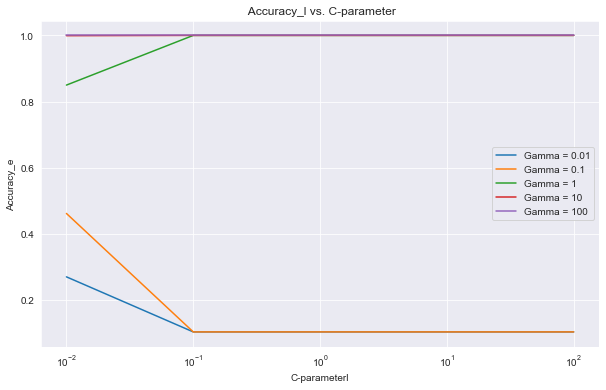

In [ ]:
fig = plt.subplots(figsize=(10, 6))
plt.title(' Accuracy_l vs. C-parameter')
plt.xlabel('C-parameterl')
plt.ylabel('Accuracy_e')
counter = 0
for i in gm:
    plt.plot(co,SVC_accuracies[counter:counter+5],label = 'Gamma = {}'.format(i))
    counter+=5
    if counter > 25:
        break
plt.semilogx()
plt.legend()
plt.show()

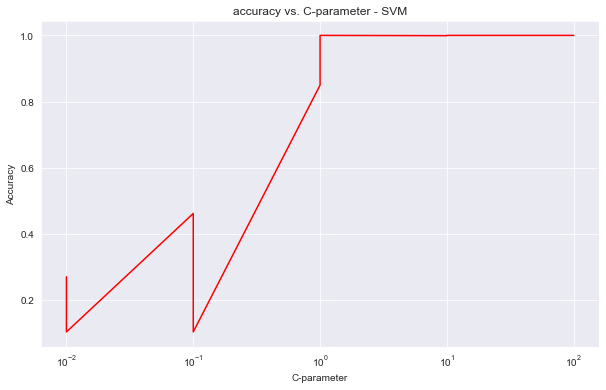

In [ ]:
fig = plt.subplots(figsize=(10, 6))
plt.title('accuracy vs. C-parameter - SVM')
plt.plot(all_acc['Cost'],all_acc['Accuracy'],color = 'r')
plt.xscale("log")
plt.xlabel('C-parameter')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
for f in co:
  filter1 = all_acc["Cost"]== f
  v = all_acc.where(filter1)
  gg = v.loc[v['Accuracy'] == v['Accuracy'].max(), 'gamma'].values[0]
  print('Gamma achive heigher acc with c = :{} is : '.format(f), gg)

Gamma achive heigher acc with c = :0.01 is :  0.01
Gamma achive heigher acc with c = :0.1 is :  0.01
Gamma achive heigher acc with c = :1 is :  0.1
Gamma achive heigher acc with c = :10 is :  0.1
Gamma achive heigher acc with c = :100 is :  0.01


In [ ]:
svm = SVC(C= 1, kernel='rbf',gamma= 0.1)
svm.fit(tr, y_train_sample)
svm_pre = svm.predict(ts)
svm_acc = accuracy_score(y_test_sample, svm_pre)
print(svm_acc)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


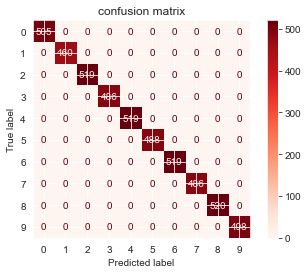

In [ ]:
con_matrix(svm,y_test_sample,svm_pre,'confusion matrix')

### Part 3 - Discussion

**Firstly**, the linear_SVM baseline model gives an accuracy of (***22.12%***), after tunning the c parameter the accuracy raised to (***45.52%***) noticed that the higher c value the more accurate the model, then adding the regularization term [L1], the accuracy also raised to (***55.08%***) and that is because of forcing the weights of uninformative features to be zero. so, the model can be more accurate.

**Secondly**, when tuning c parameter and gamma parameter together in first case [gamma = 0.01] , noticed that the higher c value the more accurate the model until c reached to 10 and 100, the model overfitted. In other cases when gamma increace the model going to overfitting. 





## Part 4. Conclusion 

<!-- Write your conclusion here -->
As a comparing between three model used in this assignment based on accuraccy 

 

*   LR is not a very good choise because this problen is not linearly separable. (47.48%)
*  Knn is also not a good choise because of curse of dimensionality.   (57.66%)
*   SVM is a algorithm for doing classification.    (84.98%)









